<a href="https://colab.research.google.com/github/grettynazario/TP1-orgaDatos/blob/master/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 75.06/95.58 Organización de Datos
# Primer Cuatrimestre de 2020
# Trabajo Práctico 1: Enunciado


El trabajo práctico 1 de la materia se basa en el análisis de los tweets del set de datos de la competencia: https://www.kaggle.com/c/nlp-getting-started.  

* `id` - identificador unico para cada  tweet

* `text` - el texto del tweet

* `location` - ubicación desde donde fue enviado (podría no estar)

* `keyword` - un keyword para el tweet  (podría faltar)

* `target` - en train.csv, indica si se trata de un desastre real  (1) o no (0)





El objetivo del primer TP es realizar un análisis exploratorio del set de datos. Queremos ver qué cosas podemos descubrir sobre los datos que puedan resultar interesantes. Estas cosas pueden estar relacionadas al objetivo del TP2 (predecir si un cierto tweet es real o no) o no, ambas son de interés.

Los requisitos de la primera entrega son los siguientes:

* El análisis debe estar hecho en Python Pandas o R.

* El análisis debe entregarse en formato pdf vía gradescope. En el informe no va código.

* Informar el link a un repositorio Github en donde pueda bajarse el código completo para generar el análisis.


La evaluación del TP se realizará en base al siguiente criterio:

* Originalidad del análisis exploratorio. 

* Calidad del reporte. ¿Está bien escrito? ¿Es claro y preciso? 

* Calidad del análisis exploratorio: qué tipo de preguntas se hacen y de qué forma se responden, ¿es la respuesta clara y concisa con respecto a la pregunta formulada? 

* Calidad de las visualizaciones presentadas.
 * ¿Tienen todos los ejes su rótulo?
 * ¿Tiene cada visualización un título?
 * ¿Es entendible la visualización sin tener que leer la explicación?
 * ¿El tipo de plot elegido es adecuado para lo que se quiere visualizar?
 * ¿Es una visualización interesante?
 * ¿El uso del color es adecuado?
 * ¿Hay un exceso o falta de elementos visuales en la visualización elegida?
 * ¿La visualización es consistente con los datos?
 * Conclusiones presentadas.
 * ¿Presenta el grupo un listado de "insights" aprendidos sobre los datos en base al análisis realizado? ¿Es interesante? 


# Resolución de Trabajo Práctico

## Instalación

In [154]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

openjdk-8-jdk-headless is already the newest version (8u252-b09-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


## Comienzo de Análisis

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Load the Data and take a quick look.
url = 'https://raw.githubusercontent.com/grettynazario/TP1-orgaDatos/master/train.csv'
tweets = pd.read_csv(url, encoding='latin-1')


##Analizando las características del dataset
Vamos a identificar a través de un pie plot en qué porcentaje los tweets que encontramos en el dataset no tienen una location ni una keyword.

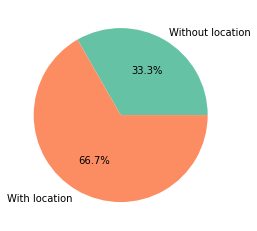

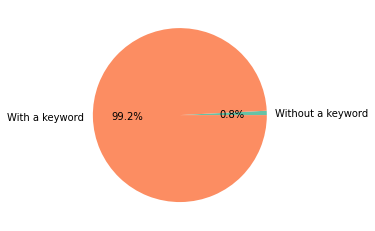

In [157]:
tweets_without_loc = tweets.location.isnull().sum()
tweets_with_loc = tweets.location.size - tweets_without_loc

values = [tweets_without_loc, tweets_with_loc]
x = ['Without location','With location']
plt.pie(values, labels=x, autopct='%0.1f%%')
plt.show()

#Análisis similar para ver si tienen keyword
tweets_without_keyw = tweets.keyword.isnull().sum()
tweets_with_keyw = tweets.keyword.size - tweets_without_keyw

values = [tweets_without_keyw, tweets_with_keyw]
x = ['Without a keyword','With a keyword']
plt.pie(values, labels=x, autopct='%0.1f%%')
plt.show()

En este primer análisis se puede apreciar que un tercio del total de los tweets no se tiene información de su ubicación. Por otra parte, la cantidad de tweets que no tienen keyword es muy pequeña en comparación con las que si tienen.

In [0]:
#Completo los NaN correspondientes a las columnas de keyword y location 
values = {'keyword':'No keyword' , 'location':'No location'}
tweets.fillna(value=values, inplace=True)

### **Análisis Keyword vs. Target**

Ahora, vamos a comparar la cantidad de veces que aparecen las keywords en el dataset en general y las keywords que más ocurrencias tienen y además son verdaderas según lo dice la columna target. 

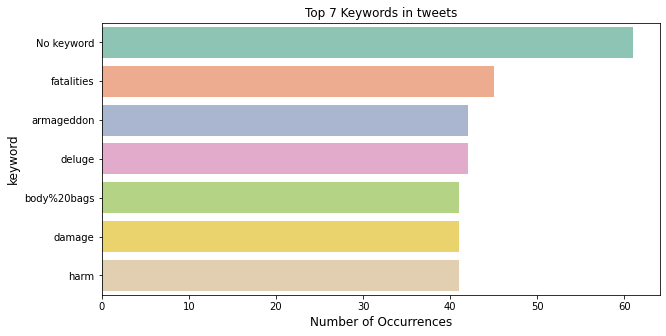

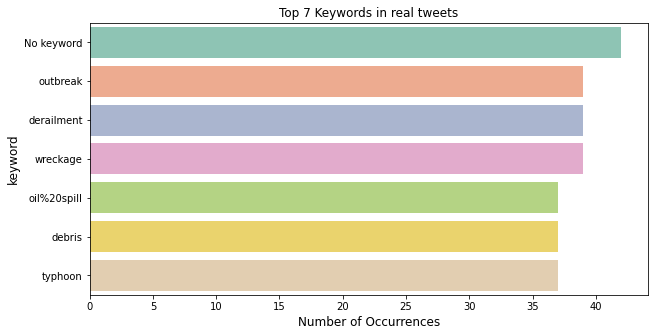

In [159]:
keyword_count  = tweets['keyword'].value_counts()
keyword_count = keyword_count[:7,]

plt.figure(figsize=(10,5))
sns.barplot(keyword_count.values, keyword_count.index, alpha=0.8)
plt.title('Top 7 Keywords in tweets')
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('keyword', fontsize=12)
plt.show()

#Me quedo sólo con los tweets marcados como verdaderos
real_tweets = tweets[tweets.target == 1]
real_tweets.head()

real_keyword_count  = real_tweets['keyword'].value_counts()
real_keyword_count = real_keyword_count[:7,]

plt.figure(figsize=(10,5))
sns.barplot(real_keyword_count.values, real_keyword_count.index, alpha=0.8)
plt.title('Top 7 Keywords in real tweets')
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('keyword', fontsize=12)
plt.show()

Podemos ver a través de los anteriores dos gráficos que tanto analizando la totalidad de los tweets como viendo sólo aquellos que son verdaderos, la mayoría de los tweets no tienen una keyword asociada.

## **Análisis Location vs. Target**

Haremos un análisis similar al realizado con la columna keyword pero ahora con la ubicación de los tweets. Vamos a ver cuáles son las 7 ubicaciones con más ocurrencia en el dataset en general y también en el subconjunto de tweets reales. Utilizaremos un pie plot.

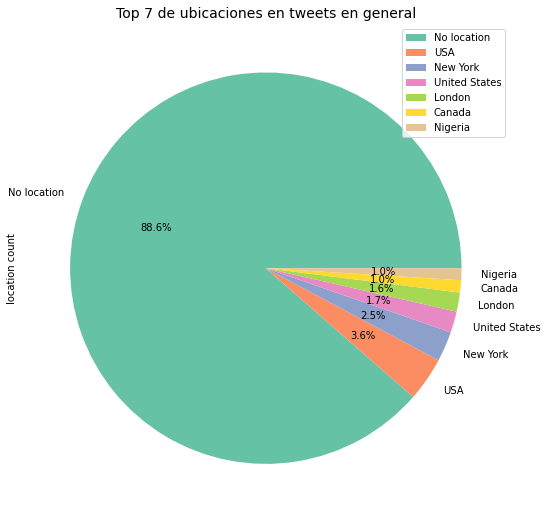

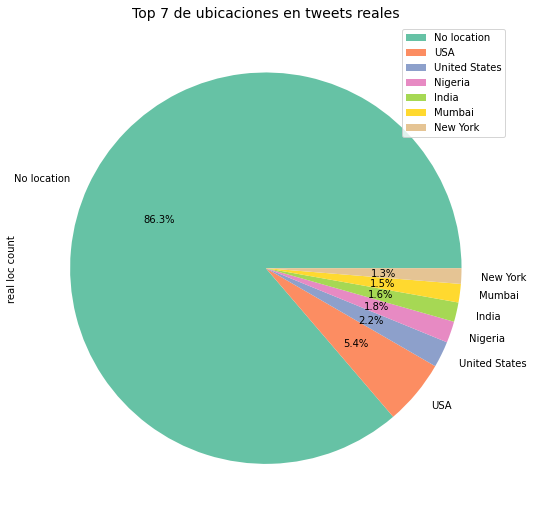

In [177]:
location_count  = tweets['location'].value_counts()
location_count = location_count[:7,]

#Me quedo sólo con los tweets que son reales -> ya lo tengo más arriba jaja :P
real_location_count  = real_tweets['location'].value_counts()
real_location_count = real_location_count[:7,]

#Visualización
loc_df = location_count.to_frame(name='location count')
plot = loc_df.plot.pie(y='location count', figsize=(9,9), autopct='%0.1f%%')
plot.set_title("Top 7 de ubicaciones en tweets en general", fontsize=14)

pp = real_location_count.to_frame(name='real loc count').plot.pie(y='real loc count', figsize=(9,9), autopct='%0.1f%%')
pp.set_title("Top 7 de ubicaciones en tweets reales", fontsize=14)

plt.show(plot, pp)

###¿Top 7 de ubicaciones no son mentirosos?
A través del pie plot no se puede apreciar mucho la participación de las otras ubicaciones, entonces vamos a ver el top 7 de ubicaciones y además, ya que sabemos que estas 7 ubicaciones son las que más tweets reales tienen, queremos analizar que relación hay entre los tweets verdaderos o falsos del total provenientes de aquellas. Para esto, utilizamos una visualización de doble barra. 

In [0]:
#real tweets count
count_real_tweets = real_tweets['location'].value_counts().to_frame().reset_index()
count_real_tweets = count_real_tweets.rename(columns = {'location':'real tweets', 'index':'location'})
#False tweets count
false_tweets = tweets[tweets.target == 0]
count_false_tweets = false_tweets['location'].value_counts().to_frame().reset_index()
count_false_tweets = count_false_tweets.rename(columns = {'location':'false tweets', 'index':'location'})
#Merge
tweets_by_locations = pd.merge(count_false_tweets,count_real_tweets, on= 'location')
tweets_by_locations = tweets_by_locations.drop(tweets_by_locations[tweets_by_locations['location']== 'No location'].index).head(7)
#index change
tweets_by_locations = tweets_by_locations.set_index('location')

Text(0, 0.5, 'Cantidad')

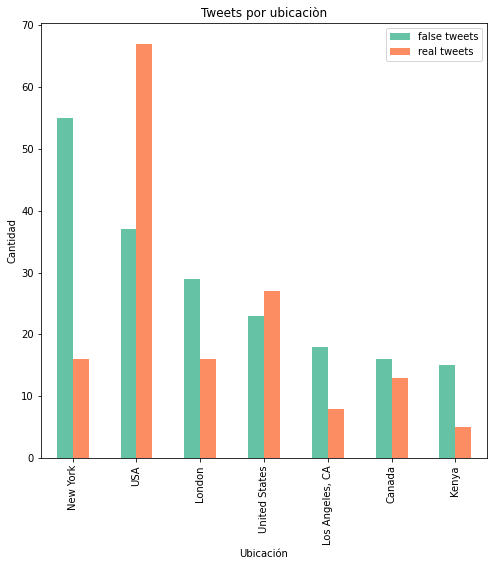

In [179]:
#Visualización top 7 de ubicaciones:

tweets_by_locations.plot(kind='bar',figsize=(8,8))
plt.title('Tweets por ubicaciòn')
plt.xlabel('Ubicación')
plt.ylabel('Cantidad')

Se puede observar en la visualización del top 7  que NEW YORK posee la mayor cantidad de tweets catastróficos falsos mientras que USA la mayor cantidad de tweets catastróficos verdaderos.

## ¿Los tweets más largos son verdaderos?


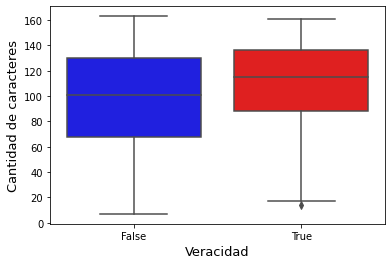

In [180]:
#Agrego columnas que tengan los valores del largo de los tweets y para cada uno, si es verdadero o no:

tweets['tweet_length'] = tweets['text'].str.len()
tweets['veracity'] = (tweets.target == 1)

sns.set_palette("Set2")
bplot = sns.boxplot(x='veracity', y='tweet_length', data=tweets, palette=['blue','red'])

bplot.set_xlabel("Veracidad", fontsize=13)
bplot.set_ylabel("Cantidad de caracteres", fontsize=13)
bplot.tick_params(labelsize=10)

In [181]:
tweets['keyword'].describe()

count           7613
unique           222
top       No keyword
freq              61
Name: keyword, dtype: object

In [182]:
(tweets['keyword'].value_counts()).describe()

count    222.000000
mean      34.292793
std        5.103441
min        9.000000
25%       33.000000
50%       35.000000
75%       37.000000
max       61.000000
Name: keyword, dtype: float64

In [0]:
grouped = tweets.groupby(['keyword']).agg({'target':['count', 'min', 'mean', 'max']})
grouped = grouped.reset_index()

In [184]:
grouped.loc[grouped[('target','mean')]>0.5,:].sort_values(('target','count'),ascending=False)

keyword target                  
                            count min      mean max
0               No keyword     61   0  0.688525   1
105             fatalities     45   0  0.577778   1
50                collided     40   0  0.575000   1
154               outbreak     40   0  0.975000   1
96                evacuate     40   0  0.625000   1
..                     ...    ...  ..       ...  ..
33                 bombing     29   0  0.931034   1
209                volcano     27   0  0.666667   1
40            bush%20fires     25   0  0.720000   1
116          forest%20fire     19   0  0.789474   1
161  radiation%20emergency      9   0  0.555556   1

[87 rows x 5 columns]